In [13]:
!pip install bertopic sentence-transformers networkx openpyxl


In [16]:

import pandas as pd
import numpy as np
import networkx as nx
from sentence_transformers import SentenceTransformer
from bertopic import BERTopic
from sklearn.metrics.pairwise import cosine_similarity


In [22]:
# Male Summary
male_summary = [
    "1. Also - the jokes.",
    "2. The jokes.",
    "3. ‘If I now shake hands with you, will you yell #MeToo’?",
    "4. It is that funny, is it?",
    "5. Women and so many men finally found the strength to share the stories of sexual misconduct and assault and some men need to joke about it.",
    "6. Still, better than my neighbour or 'Stalker' as we like to call him, who I v gently turned down so naturally went on an intimidation spree, inc what felt like constantly standing outside my front door listening, which went on for 18ms.",
    "7. I was lucky, his ex said he was violent #metoo Thanks @BDUTT for being the rare voice in the industry to believe the women who spoke out against him.",
    "8. And thanks specially to @natashjarathore for opening the door for others who wanted to speak up.",
    "9. I am not sure this is a victory until he acknowledges the allegations.",
    "10. #metoo https://t.co/LUY1k9JYjF I have been asking media houses to debate this but these spineless guys don't ever discuss such incidents.",
    "11. Biased media could only talk #MeToo at prime time to demean the men of this country.",
    "12. Poor guard with no mistake is behind bars.",
    "13. Jago Jago @Dev_Fadnavis @CMOMaharashtra https://t.co/YiqjjA5sq @HBO it's also not ok to abuse, threaten & attempt to quell those speaking out against this abhorrent behaviour, which sees your actors promoting sexual misconduct, and the humanisation of traffickers and predatory behaviour under the guise of art and media #metoo #timesup @Channel4 This looks great but Sean Penn’s opinions on the #MeToo movement and his defense of a prolific sexual predator mean I won’t be watching this.",
    "14. Shame.",
    "15. #MeToo I was afraid.",
    "16. Now I’m not.",
    "17. He took my strength but slowly I am getting it back One small-time Tamil actor says, \"did Vairamuthu commit the crime of robbing jewels?",
    "18. He just asked a woman to bed.",
    "19. He is a man, no?",
    "20. Activist Thirumurugan Gandhi puts down #metoo movement itself to covertly defend Vairamuthu.",
    "21. Huh!",
    "22. No press, no men, no leadership.",
    "23. NO.",
    "24. #MeToo https://t.co/E6R9c0LA9J.",
    "25. Patriarchy is a trap"
]

# Female Summary
female_summary = [
    "#MeToo #MeTooIndia #MeTooControversy #MeToo4Publicity Take that ....",
    "2. This Me too is a well orchestrated Feminist Propaganda...",
    "3. It is clearly used to create a divide in families destroy the cultural fabric of family values https://t.co/ERKULzlpqm.",
    "4. In the past few days, several incidents of faux feminism have woken people up against the \"believe all women\" bullshit being propagated in light of the #MeToo movement.",
    "5. \"The woman who does not require validation from anyone is the most feared individual on the planet.\" Mohadesa Najumi #Vote #MeToo #SpeakTruthToPower #Truth #Leadership #BlueWave Hey @JimmyKimmelLive, strangely you guys forgot to upload the clip “#Freeman on allegations of sexual misconduct”.",
    "6. One might get the idea #Kimmel didn’t mention the @CNN story and #MeToo isn’t fun material anyway.",
    "7. Or was there no time left for 16 women?",
    "8. #TimesUp @TIMESUPNOW https://t.co/nk6JOPDmlo First hand account of a survivor from @TeachForIndia.",
    "9. @heauxbaton publicly talks about her internship at TFI and the sexual harassment and abuse she faced.",
    "10. @DeShobhaa No Hindu Vrat is compulsory, generally women who are in joyous and happy status of wifehood enjoy performing this Vrat for their husbands.",
    "11. A day reserved to celebrate togetherness.",
    "12. Even highly qualified women perform it.",
    "13. Why are you mocking them ?",
    "14. #MeToo is high society Vrat !",
    "15. I have been tweeting about this incident since yesterday ?",
    "16. Wonder where is the #metoo brigade ...??",
    "17. The model stripped her clothes and many saw her in that semi nude pose.",
    "18. Video has reached millions, now what ?",
    "19. Arrest #MeghaSharma https://t.co/xRPP1TFIQ1 #FBRparty my first I AM WOMAN HERE ME ROAR IN NUMBERS TO BIG TO IGNORE we need to take back our power All of us who feel we are being held down by the GOP PARTY Like Comment Retweet Follow #bluewave #GetOutTheVote #MeToo #Ibelievesurvivors I need influencers to help me get the word out.",
    "20. I am Alex Jones’ ex-wife & I am NOT the underdog.",
    "21. I am you.",
    "22. I love you.",
    "23. https://t.co/bGHAJAVnbv #metoo movt.",
    "24. #TimesUp #MeToo.",
    "25. https://t.co/M3gyegGpMc."
]

# Both Summary
both_summary = [
    "1. Watching #IranUnveiled on ITV.",
    "2. The kind of oppression of women that #MeToo and other liberal left campaigns *should* be fighting against rather than going berserk over a bloke touching someone’s knee at a dinner party.",
    "3. 🙄 @MuralikrishnaE1 @ssingapuri @RV9933 @swetasamadhiya Man is known by the company, he keeps.",
    "4. & Woman is known by the company, she discards.",
    "5. 🤣🤣🤣🤣🤣🤣🤣 #MeToo Iwas going to be a Hillary Supporter, Vegan, Male Feminist, apart of the #MeToo movement, or a #PlannedParenthood lobbyist for Halloween..... but I realized my head wouldn’t fit up my ass Breaking down gender stereotypes allows boys, girls, and all youth to be their best, most authentic selves.",
    "6. Join us and be a part of the change: #GirlsToo #MeToo https://t.co/CLUxepsORn https://t.co/HnmVCaTp64 ❗#MeToo A journalist has been working on a piece on Ravi Melwani, founder of RMF, since January '18.",
    "7. He spoke to ~12 women Melwani allegedly harassed.",
    "8. This has been a year in the making.",
    "9. It's finally up, & the stories are horrifying.",
    "10. Read.",
    "11. https://t.co/I8KhAMmciH #TimesUp @RogueNASA Except they actually know Kavanaugh allegations were true, they just see no downside of weaponizing #metoo if it works Mueller is discredited and they have grounds to fire him.",
    "12. If it fails they can say, \"look women DO makeup allegations to harm innocent men! Well done #hamont.",
    "13. Tonight's event with #metoo founder Tarana Burke in the McIntyre Theatre is sold out with nearly $10,000 in ticket sales being donated to @SACHAhamont.",
    "14. @mohawkcollege is proud to collaborate with @McMasterU & @BrockUniversity on this important conversation.",
    "15. #MeToo Founder Tarana Burke Breaks Down Why Bill Clinton’s Affair With Monica Lewinsky Was an Abuse of Power https://t.co/8LLHUtQtCo Don't get fooled by #MeToo gang.",
    "16. #SpeakUpMan to Stop #MeToo4Publicity https://t.co/7OFBeCFJC0 Don't get fooled by #MeToo gang.",
    "17. #SpeakUpMan to Stop abuse of Men and Demand Gender Neutral law.",
    "18. If Women do not do such crime, why they afraid for Gender neutral Law?",
    "19. 'This is not just about rewarding the bad behavior of powerful men, but the ways in which this culture pushes women out and sidelines their careers.'",
    "20. @alexismadrigal @TheAtlantic @google https://t.co/1VFSxBLdLS #timesup #metoo #changetheratio #fundfemalefounders #diversity #MeToo Brought Down 201 Powerful Men.",
    "21. Nearly Half of Their Replacements are Women.",
    "22. https://t.co/rWHhY4zO9a People are speaking about how toxic feminism is damaging the #MeToo movement.",
    "23. Let's talk & address toxic masculinity first - that's where the real problem is.",
    "24. We can address everything else later on!",
    "25. Pain knows no gender."
]

# Combined Sentences
combined_sentences = male_summary + female_summary + both_summary


In [24]:
model = SentenceTransformer("all-MiniLM-L6-v2")
embeddings = model.encode(combined_sentences, convert_to_tensor=True)


In [26]:
similarity_matrix = cosine_similarity(embeddings.cpu().numpy())


In [28]:
threshold = 0.32
G = nx.Graph()

# Add nodes
for idx, sentence in enumerate(combined_sentences):
    G.add_node(idx, sentence=sentence)

# Add edges based on similarity threshold
for i in range(len(combined_sentences)):
    for j in range(i+1, len(combined_sentences)):
        sim = similarity_matrix[i][j]
        if sim >= threshold:
            G.add_edge(i, j, weight=sim)


In [30]:
scores = nx.pagerank(G, weight='weight')
ranked_sentences = sorted(((scores[i], s) for i, s in enumerate(combined_sentences)), reverse=True)
summary_lexrank = [sent for score, sent in ranked_sentences[:25]]

# Print summary
print("\n".join(summary_lexrank))


22. https://t.co/rWHhY4zO9a People are speaking about how toxic feminism is damaging the #MeToo movement.
7. I was lucky, his ex said he was violent #metoo Thanks @BDUTT for being the rare voice in the industry to believe the women who spoke out against him.
24. #MeToo https://t.co/E6R9c0LA9J.
15. #MeToo I was afraid.
16. #SpeakUpMan to Stop #MeToo4Publicity https://t.co/7OFBeCFJC0 Don't get fooled by #MeToo gang.
23. Let's talk & address toxic masculinity first - that's where the real problem is.
15. #MeToo Founder Tarana Burke Breaks Down Why Bill Clinton’s Affair With Monica Lewinsky Was an Abuse of Power https://t.co/8LLHUtQtCo Don't get fooled by #MeToo gang.
23. https://t.co/bGHAJAVnbv #metoo movt.
12. If it fails they can say, "look women DO makeup allegations to harm innocent men! Well done #hamont.
6. One might get the idea #Kimmel didn’t mention the @CNN story and #MeToo isn’t fun material anyway.
24. We can address everything else later on!
20. I am Alex Jones’ ex-wife & I a

In [44]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download required NLTK resources
nltk.download('stopwords')
nltk.download('punkt')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [46]:
def count_gender_terms(summary, male_terms, female_terms):
    male_count = 0
    female_count = 0
    stop_words = set(stopwords.words('english'))  # This line requires the stopwords import

    for sentence in summary:
        words = word_tokenize(sentence.lower())  # Tokenize each sentence into words
        filtered_words = [word for word in words if word.isalnum() and word not in stop_words]

        for word in filtered_words:
            if word in male_terms:
                male_count += 1
            elif word in female_terms:
                female_count += 1

    return male_count, female_count


In [48]:
# Gender term lists
male_terms = {'god', 'gods', 'nephew', 'nephews', 'him', 'baron', 'father', 'fathers' 'dukes', 'dad', 'beau', 'beaus', 'daddies',
        'policeman', 'policemen', 'grandfather', 'landlord', 'landlords', 'monk', 'monks', 'step-son', 'step-sons', 
        'milkmen', 'chairmen', 'chairman', 'steward', 'men', 'masseurs', 'son-in-law', 'priest', 'king', 'governor', 
        'waiter', 'daddy', 'steward', 'emperor', 'son', 'proprietor', 'groom', 'grooms', 'gentleman', 'gentlemen', 'sir', 
        'wizards', 'sorcerer', 'lad','milk-man', 'grandson', 'grand-son','congressmen','dads', 'manager', 'prince', 'stepfathers', 
        'boyfriend', 'shepherd', 'shepherds', 'males', 'grandfathers', 'grand-fathers', 'husband', 'usher', 'postman','stags', 
        'husbands', 'host', 'boy', 'waiter', 'bachelor', 'bachelors', 'businessmen', 'duke', 'sirs', 'papas', 'heir', 'uncle', 
        'princes', 'fiance', 'mr', 'count', 'lords', 'father-in-law', 'actor', 'actors', 'postmaster', 'headmaster', 'heroes',
        'businessman', 'boars','wizard', 'sons-in-law', 'fiances', 'uncles', 'hunter', 'lads', 'masters', 'brother', 
        'hosts', 'poet', 'hero', 'grandpa', 'grandpas','manservant', 'heirs', 'male', 'tutors', 'millionaire',
        'congressman', 'sire', 'sires', 'widower','grandsons', 'grand-sons','boys', 'he', 'step-father', 'jewess', 'bridegroom', 'bridegrooms'
        'stepfather', 'widowers', 'abbot', 'mr.,' 'brothers', 'man', 'sons', 'boyfriends', 'he’s', 'his', 'earl', 
        'giant', 'stepson', 'stepsons', 'poet', 'mayor', 'peer', 'negro', 'abbot', 'traitor', 'benefactor',
        'instructor', 'conductor', 'founder', 'founders', 'hunters', 'huntresses', 'tempt', 'enchanter', 'enchanters', 'songster', 
        'songsters', 'murderer', 'murderers', 'patron', 'patrons', 'author', 'czar', 'guy', 'spokesman', 'spokesmen',
        'pa', 'councilman', 'council-man', 'councilmen', 'council-men', 'gay', 'gays', 'prostate cancer', 'fraternity', 'fraternities', 'salesman', 'dude', 'dudes', 'paternal',
        'brotherhood', 'statesman', 'statesmen', 'countryman', 'countrymen', 'suitor', 'macho', 'papa', 'strongman', 'strongmen',
        'boyhood', 'manhood', 'masculine', 'macho', 'horsemen', 'brethren', 'chap','chaps', 'schoolboy', 'schoolboys', 'bloke',
        'blokes', 'patriarch', 'patriachy', 'fatherhood', 'hubby', 'hubbies', 'fella', 'fellas', 'handyman', 'fraternal', 
        'bro', 'masculinity', 'ballerino', 'pappy', 'papi', 'pappies', 'dada', 'bf', 'bfs', 'knights', 'knight', 
        'menfolk', 'brotherly', 'manly', 'pimp', 'pimps', 'homeboy', 'homeboys','grandnephew', 'grand-nephew',
        'grand-nephew', 'grand-nephews', 'john doe', 'nobleman', 'noblemen', 'dream boy', 'himself', 'gramps'}
female_terms = {'goddesses', 'niece', 'baroness', 'mother', 'duchesses', 'mom', 'belle', 'belles', 'mummies', 'policewoman',
          'grandmother', 'landlady', 'landladies', 'nuns', 'stepdaughter', 'milkmaids', 'chairwomen', 'stewardesses',
          'women', 'masseuses', 'daughter-in-law', 'priestesses', 'stewardess', 'empress', 'daughter', 'queens',
          'proprietress', 'brides', 'lady', 'queen', 'matron', 'waitresses', 'mummy', 'empresses', 'madam', 
          'witches', 'sorceress', 'lass', 'milkmaid', 'granddaughter', 'grand-daughter', 'congresswomen','moms', 'manageress', 
          'princess', 'stepmothers', 'stepdaughters', 'girlfriend', 'shepherdess', 'females', 'grand-mothers', 'grandmothers'
          'step-daughter', 'nieces', 'priestess', 'wife', 'mothers', 'usherette', 'postwoman', 'hinds', 'wives', 
          'murderess', 'hostess', 'girl', 'waitress', 'spinster', 'shepherdess', 'businesswomen', 'duchess', 'madams', 'mamas',
          'nun', 'heiress', 'aunt', 'princesses', 'fiancee', 'mrs', 'ladies', 'mother-in-law', 'actress', 'actresses', 
          'postmistress', 'headmistress', 'heroines', 'bride', 'businesswoman', 'baronesses', 'sows', 'witch',
          'daughters-in-law','aunts', 'huntress', 'lasses', 'mistress', 'mistresses', 'sister', 'hostesses', 'poetess', 
          'masseuse', 'heroine', 'goddess','grandma', 'grandmas', 'maidservant', 'heiresses', 'patroness',
          'female', 'governesses', 'millionairess', 'congresswoman', 'dam', 'widow', 'granddaughters', 'grand-daughters', 'headmistresses', 
          'girls', 'she', 'policewomen', 'step-mother','stepmother', 'widows', 'abbess', 'mrs.', 'chairwoman', 'sisters',
          'mama', 'woman','daughters', 'girlfriends', 'she’s', 'her', 'maid', 'countess', 'giantess', 'poetess', 'jew',
          'mayoress', 'peeress', 'negress', 'abbess', 'traitress', 'benefactress', 'instructress', 'conductress', 'founder',
          'huntress', 'temptress', 'enchantress', 'songstress', 'murderess', 'murderesses', 'patronesses', 'authoress', 'czarina',
          'spokeswoman', 'spokeswomen', 'ma', 'councilwoman', 'council-woman', 'councilwomen', 'council-women', 'mum', 'lesbian', 'lesbians', 'breast', 'breasts'
          'maiden', 'maidens', 'sorority', 'sororities', 'saleswoman', 'dudette', 'maternal', 'feminist', 'feminists', 'sisterhood', 
          'housewife', 'housewives', 'stateswoman', 'stateswomen', 'countrywoman', 'countrywomen', 'chick', 'chicks', 'mommy',
          'strongwoman', 'strongwomen', 'babe', 'babes', 'diva', 'divas', 'feminine', 'feminism', 'gal', 'gals', 'sistren', 'schoolgirl',
          'schoolgirls', 'matriarch', 'matriarchy', 'motherhood', 'wifey', 'sis', 'femininity', 'ballerina', 'ballerinas', 'granny', 
          'grannies', 'mami', 'momma', "ma'am", 'gf', 'gfs', 'damsel', 'damsels', 'vixen', 'vixens', 'nan', 'nanny', 'nannies',
          'auntie', 'womenfolk', 'sisterly', 'motherly', 'homegirl', 'homegirls', 'grand-neice', 'grand-neices',
          'grandneice', 'grandneices', 'jane doe', 'noblewoman', 'noblewomen', 'dream girl', 'madame', 'herself', 'hers'}

In [50]:
combined_summary = [
    "People are speaking about how toxic feminism is damaging the #MeToo movement.",
    "I was lucky, his ex said he was violent #metoo Thanks @BDUTT for being the rare voice in the industry to believe the women who spoke out against him.",
    "#MeToo",
    "I was afraid.",
    "#SpeakUpMan to Stop #MeToo4Publicity Don't get fooled by #MeToo gang.",
    "Let's talk & address toxic masculinity first - that's where the real problem is.",
    "#MeToo Founder Tarana Burke Breaks Down Why Bill Clinton’s Affair With Monica Lewinsky Was an Abuse of Power Don't get fooled by #MeToo gang.",
    "#metoo movt.",
    "If it fails they can say, 'look women DO makeup allegations to harm innocent men! Well done #hamont.",
    "One might get the idea #Kimmel didn’t mention the @CNN story and #MeToo isn’t fun material anyway.",
    "We can address everything else later on!",
    "I am Alex Jones’ ex-wife & I am NOT the underdog.",
    "#SpeakUpMan to Stop abuse of Men and Demand Gender Neutral law.",
    "'This is not just about rewarding the bad behavior of powerful men, but the ways in which this culture pushes women out and sidelines their careers.'",
    "#TimesUp #MeToo.",
    "#MeToo is high society Vrat !",
    "This has been a year in the making.",
    "I am not sure this is a victory until he acknowledges the allegations.",
    "Join us and be a part of the change: #GirlsToo #MeToo https://t.co/CLUxepsORn https://t.co/HnmVCaTp64 ❗#MeToo A journalist has been working on a piece on Ravi Melwani, founder of RMF, since January '18.",
    "Even highly qualified women perform it.",
    "In the past few days, several incidents of faux feminism have woken people up against the 'believe all women' bullshit being propagated in light of the #MeToo movement.",
    "Wonder where is the #metoo brigade ...??",
    "@alexismadrigal @TheAtlantic @google https://t.co/1VFSxBLdLS #timesup #metoo #changetheratio #fundfemalefounders #diversity #MeToo Brought Down 201 Powerful Men.",
    "Biased media could only talk #MeToo at prime time to demean the men of this country.",
    "Women and so many men finally found the strength to share the stories of sexual misconduct and assault and some men need to joke about it."
]
male_count, female_count = count_gender_terms(combined_summary, male_terms, female_terms)

# Avoid division by zero
total = male_count + female_count
if total > 0:
    male_ratio = male_count / total
    female_ratio = female_count / total
    bias_score = female_ratio - male_ratio
else:
    male_ratio = female_ratio = bias_score = 0

# Display results
print(f"Male Mentions: {male_count}")
print(f"Female Mentions: {female_count}")
print(f"Bias Score (female - male): {bias_score:.2f}")

if bias_score > 0:
    print("🟣 Summary is biased toward females.")
elif bias_score < 0:
    print("🔵 Summary is biased toward males.")
else:
    print("⚪ Summary appears neutral.")


Male Mentions: 10
Female Mentions: 8
Bias Score (female - male): -0.11
🔵 Summary is biased toward males.


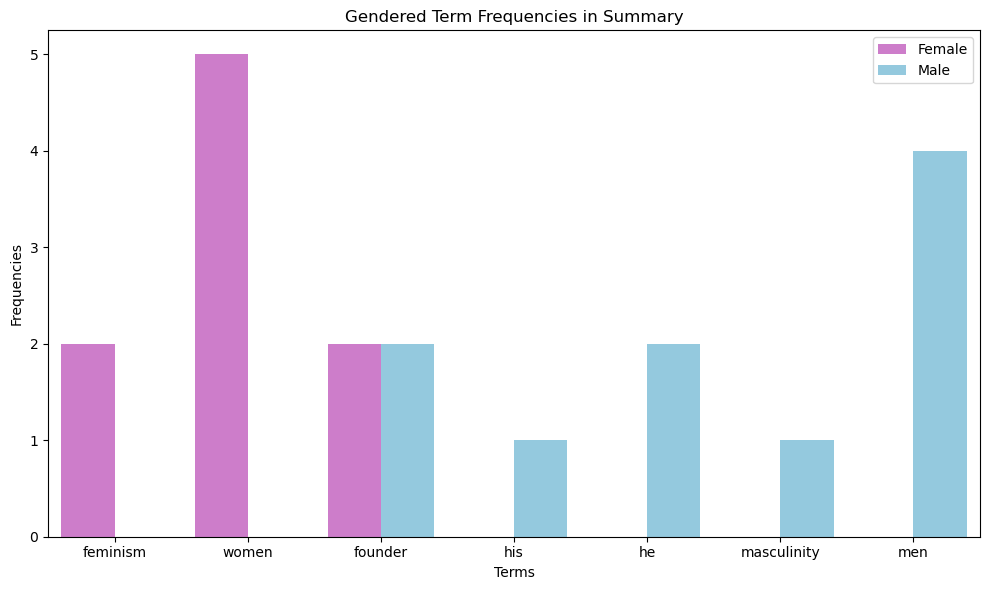

🟣 Unique Female Terms and Frequencies:
  feminism: 2
  women: 5
  founder: 2

🔵 Unique Male Terms and Frequencies:
  his: 1
  he: 2
  masculinity: 1
  founder: 2
  men: 4

🧮 Weighted Female Score: 9
🧮 Weighted Male Score: 10
📊 Bias Score (female - male): -0.05
🔵 Summary is biased toward males.


C:\Users\HP\AppData\Local\Temp\ipykernel_6892\1996027573.py:149: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Gender', y='Weighted Inclusion Bias', data=df, palette=["#609db0", "#fdac84"])


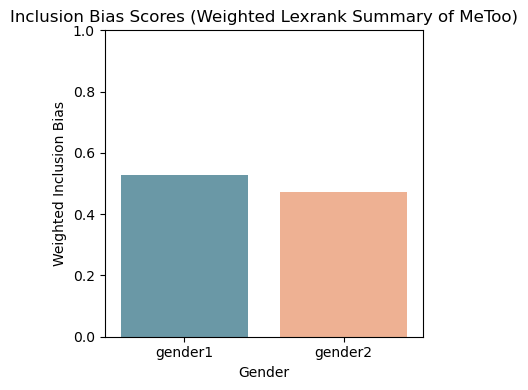

In [1]:
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
male_terms = {'god', 'gods', 'nephew', 'nephews', 'him', 'baron', 'father', 'fathers' 'dukes', 'dad', 'beau', 'beaus', 'daddies',
        'policeman', 'policemen', 'grandfather', 'landlord', 'landlords', 'monk', 'monks', 'step-son', 'step-sons', 
        'milkmen', 'chairmen', 'chairman', 'steward', 'men', 'masseurs', 'son-in-law', 'priest', 'king', 'governor', 
        'waiter', 'daddy', 'steward', 'emperor', 'son', 'proprietor', 'groom', 'grooms', 'gentleman', 'gentlemen', 'sir', 
        'wizards', 'sorcerer', 'lad','milk-man', 'grandson', 'grand-son','congressmen','dads', 'manager', 'prince', 'stepfathers', 
        'boyfriend', 'shepherd', 'shepherds', 'males', 'grandfathers', 'grand-fathers', 'husband', 'usher', 'postman','stags', 
        'husbands', 'host', 'boy', 'waiter', 'bachelor', 'bachelors', 'businessmen', 'duke', 'sirs', 'papas', 'heir', 'uncle', 
        'princes', 'fiance', 'mr', 'count', 'lords', 'father-in-law', 'actor', 'actors', 'postmaster', 'headmaster', 'heroes',
        'businessman', 'boars','wizard', 'sons-in-law', 'fiances', 'uncles', 'hunter', 'lads', 'masters', 'brother', 
        'hosts', 'poet', 'hero', 'grandpa', 'grandpas','manservant', 'heirs', 'male', 'tutors', 'millionaire',
        'congressman', 'sire', 'sires', 'widower','grandsons', 'grand-sons','boys', 'he', 'step-father', 'jewess', 'bridegroom', 'bridegrooms'
        'stepfather', 'widowers', 'abbot', 'mr.,' 'brothers', 'man', 'sons', 'boyfriends', 'he’s', 'his', 'earl', 
        'giant', 'stepson', 'stepsons', 'poet', 'mayor', 'peer', 'negro', 'abbot', 'traitor', 'benefactor',
        'instructor', 'conductor', 'founder', 'founders', 'hunters', 'huntresses', 'tempt', 'enchanter', 'enchanters', 'songster', 
        'songsters', 'murderer', 'murderers', 'patron', 'patrons', 'author', 'czar', 'guy', 'spokesman', 'spokesmen',
        'pa', 'councilman', 'council-man', 'councilmen', 'council-men', 'gay', 'gays', 'prostate cancer', 'fraternity', 'fraternities', 'salesman', 'dude', 'dudes', 'paternal',
        'brotherhood', 'statesman', 'statesmen', 'countryman', 'countrymen', 'suitor', 'macho', 'papa', 'strongman', 'strongmen',
        'boyhood', 'manhood', 'masculine', 'macho', 'horsemen', 'brethren', 'chap','chaps', 'schoolboy', 'schoolboys', 'bloke',
        'blokes', 'patriarch', 'patriachy', 'fatherhood', 'hubby', 'hubbies', 'fella', 'fellas', 'handyman', 'fraternal', 
        'bro', 'masculinity', 'ballerino', 'pappy', 'papi', 'pappies', 'dada', 'bf', 'bfs', 'knights', 'knight', 
        'menfolk', 'brotherly', 'manly', 'pimp', 'pimps', 'homeboy', 'homeboys','grandnephew', 'grand-nephew',
        'grand-nephew', 'grand-nephews', 'john doe', 'nobleman', 'noblemen', 'dream boy', 'himself', 'gramps'}
female_terms = {'goddesses', 'niece', 'baroness', 'mother', 'duchesses', 'mom', 'belle', 'belles', 'mummies', 'policewoman',
          'grandmother', 'landlady', 'landladies', 'nuns', 'stepdaughter', 'milkmaids', 'chairwomen', 'stewardesses',
          'women', 'masseuses', 'daughter-in-law', 'priestesses', 'stewardess', 'empress', 'daughter', 'queens',
          'proprietress', 'brides', 'lady', 'queen', 'matron', 'waitresses', 'mummy', 'empresses', 'madam', 
          'witches', 'sorceress', 'lass', 'milkmaid', 'granddaughter', 'grand-daughter', 'congresswomen','moms', 'manageress', 
          'princess', 'stepmothers', 'stepdaughters', 'girlfriend', 'shepherdess', 'females', 'grand-mothers', 'grandmothers'
          'step-daughter', 'nieces', 'priestess', 'wife', 'mothers', 'usherette', 'postwoman', 'hinds', 'wives', 
          'murderess', 'hostess', 'girl', 'waitress', 'spinster', 'shepherdess', 'businesswomen', 'duchess', 'madams', 'mamas',
          'nun', 'heiress', 'aunt', 'princesses', 'fiancee', 'mrs', 'ladies', 'mother-in-law', 'actress', 'actresses', 
          'postmistress', 'headmistress', 'heroines', 'bride', 'businesswoman', 'baronesses', 'sows', 'witch',
          'daughters-in-law','aunts', 'huntress', 'lasses', 'mistress', 'mistresses', 'sister', 'hostesses', 'poetess', 
          'masseuse', 'heroine', 'goddess','grandma', 'grandmas', 'maidservant', 'heiresses', 'patroness',
          'female', 'governesses', 'millionairess', 'congresswoman', 'dam', 'widow', 'granddaughters', 'grand-daughters', 'headmistresses', 
          'girls', 'she', 'policewomen', 'step-mother','stepmother', 'widows', 'abbess', 'mrs.', 'chairwoman', 'sisters',
          'mama', 'woman','daughters', 'girlfriends', 'she’s', 'her', 'maid', 'countess', 'giantess', 'poetess', 'jew',
          'mayoress', 'peeress', 'negress', 'abbess', 'traitress', 'benefactress', 'instructress', 'conductress', 'founder',
          'huntress', 'temptress', 'enchantress', 'songstress', 'murderess', 'murderesses', 'patronesses', 'authoress', 'czarina',
          'spokeswoman', 'spokeswomen', 'ma', 'councilwoman', 'council-woman', 'councilwomen', 'council-women', 'mum', 'lesbian', 'lesbians', 'breast', 'breasts'
          'maiden', 'maidens', 'sorority', 'sororities', 'saleswoman', 'dudette', 'maternal', 'feminist', 'feminists', 'sisterhood', 
          'housewife', 'housewives', 'stateswoman', 'stateswomen', 'countrywoman', 'countrywomen', 'chick', 'chicks', 'mommy',
          'strongwoman', 'strongwomen', 'babe', 'babes', 'diva', 'divas', 'feminine', 'feminism', 'gal', 'gals', 'sistren', 'schoolgirl',
          'schoolgirls', 'matriarch', 'matriarchy', 'motherhood', 'wifey', 'sis', 'femininity', 'ballerina', 'ballerinas', 'granny', 
          'grannies', 'mami', 'momma', "ma'am", 'gf', 'gfs', 'damsel', 'damsels', 'vixen', 'vixens', 'nan', 'nanny', 'nannies',
          'auntie', 'womenfolk', 'sisterly', 'motherly', 'homegirl', 'homegirls', 'grand-neice', 'grand-neices',
          'grandneice', 'grandneices', 'jane doe', 'noblewoman', 'noblewomen', 'dream girl', 'madame', 'herself', 'hers'}


def calculate_weighted_bias(summary, male_terms, female_terms):
    # If summary is a list, join it into a single string
    if isinstance(summary, list):
        summary = ' '.join(summary)
        
    summary = summary.lower()
    words = summary.split()
    word_freq = Counter(words)

    # Filter and display frequencies of gendered terms
    female_freqs = {term: freq for term, freq in word_freq.items() if term in female_terms}
    male_freqs = {term: freq for term, freq in word_freq.items() if term in male_terms}

    all_terms = list(female_freqs.keys()) + list(male_freqs.keys())
    all_freqs = list(female_freqs.values()) + list(male_freqs.values())
    categories = ['Female'] * len(female_freqs) + ['Male'] * len(male_freqs)

    plt.figure(figsize=(10, 6))
    sns.barplot(x=all_terms, y=all_freqs, hue=categories, palette={'Female': 'orchid', 'Male': 'skyblue'})
    plt.title("Gendered Term Frequencies in Summary")
    plt.xlabel("Terms")
    plt.ylabel("Frequencies")
    plt.tight_layout()
    plt.show()

    print("🟣 Unique Female Terms and Frequencies:")
    for term, freq in female_freqs.items():
        print(f"  {term}: {freq}")

    print("\n🔵 Unique Male Terms and Frequencies:")
    for term, freq in male_freqs.items():
        print(f"  {term}: {freq}")
        female_score = sum(freq for freq in female_freqs.values())
    male_score = sum(freq for freq in male_freqs.values())

    total = female_score + male_score
    if total > 0:
        female_ratio = female_score / total
        male_ratio = male_score / total
        bias_score = female_ratio - male_ratio
    else:
        female_ratio = male_ratio = bias_score = 0

    print(f"\n🧮 Weighted Female Score: {female_score}")
    print(f"🧮 Weighted Male Score: {male_score}")
    print(f"📊 Bias Score (female - male): {bias_score:.2f}")

    if bias_score > 0:
        print("🟣 Summary is biased toward females.")
    elif bias_score < 0:
        print("🔵 Summary is biased toward males.")
    else:
        print("⚪ Summary appears neutral.")

    return female_ratio, male_ratio


combined_summary = [
"People are speaking about how toxic feminism is damaging the #MeToo movement.",
    "I was lucky, his ex said he was violent #metoo Thanks @BDUTT for being the rare voice in the industry to believe the women who spoke out against him.",
    "#MeToo",
    "I was afraid.",
    "#SpeakUpMan to Stop #MeToo4Publicity Don't get fooled by #MeToo gang.",
    "Let's talk & address toxic masculinity first - that's where the real problem is.",
    "#MeToo Founder Tarana Burke Breaks Down Why Bill Clinton’s Affair With Monica Lewinsky Was an Abuse of Power Don't get fooled by #MeToo gang.",
    "#metoo movt.",
    "If it fails they can say, 'look women DO makeup allegations to harm innocent men! Well done #hamont.",
    "One might get the idea #Kimmel didn’t mention the @CNN story and #MeToo isn’t fun material anyway.",
    "We can address everything else later on!",
    "I am Alex Jones’ ex-wife & I am NOT the underdog.",
    "#SpeakUpMan to Stop abuse of Men and Demand Gender Neutral law.",
    "'This is not just about rewarding the bad behavior of powerful men, but the ways in which this culture pushes women out and sidelines their careers.'",
    "#TimesUp #MeToo.",
    "#MeToo is high society Vrat !",
    "This has been a year in the making.",
    "I am not sure this is a victory until he acknowledges the allegations.",
    "Join us and be a part of the change: #GirlsToo #MeToo https://t.co/CLUxepsORn https://t.co/HnmVCaTp64 ❗#MeToo A journalist has been working on a piece on Ravi Melwani, founder of RMF, since January '18.",
    "Even highly qualified women perform it.",
    "In the past few days, several incidents of faux feminism have woken people up against the 'believe all women' bullshit being propagated in light of the #MeToo movement.",
    "Wonder where is the #metoo brigade ...??",
    "@alexismadrigal @TheAtlantic @google https://t.co/1VFSxBLdLS #timesup #metoo #changetheratio #fundfemalefounders #diversity #MeToo Brought Down 201 Powerful Men.",
    "Biased media could only talk #MeToo at prime time to demean the men of this country.",
    "Women and so many men finally found the strength to share the stories of sexual misconduct and assault and some men need to joke about it."
]

female_ratio, male_ratio = calculate_weighted_bias(combined_summary, male_terms, female_terms)

import pandas as pd

data = {
    'Gender': ['gender1', 'gender2'],
    'Weighted Inclusion Bias': [male_ratio, female_ratio]
}
df = pd.DataFrame(data)

plt.figure(figsize=(4, 4))
sns.barplot(x='Gender', y='Weighted Inclusion Bias', data=df, palette=["#609db0", "#fdac84"])
plt.title('Inclusion Bias Scores (Weighted Lexrank Summary of MeToo)')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()








=== Gender Term Frequencies ===
Female Terms:
  feminism: 4
  nuns: 1
  herself: 3
  females: 1
  mother: 3
  ladies: 1
  woman: 27
  girl: 5
  feminist: 9
  wife: 3
  women: 104
  sisters: 1
  she: 46
  mom: 1
  actress: 4
  girls: 12
  her: 43
  feminists: 1
  lady: 4
  female: 8
  mama: 1
  femininity: 1
  wives: 2
  founder: 5

Male Terms:
  masculinity: 2
  husbands: 3
  men: 31
  policemen: 1
  masculine: 1
  mr: 1
  boys: 3
  his: 37
  sons: 3
  he: 44
  man: 25
  gentlemen: 1
  bloke: 1
  murderer: 1
  actors: 3
  guy: 2
  male: 7
  boy: 2
  policeman: 1
  count: 2
  himself: 1
  manhood: 1
  sir: 2
  actor: 5
  founder: 5
  governor: 1
  murderers: 2
  him: 14

=== Bias Summary ===
Weighted Female Score: 290
Weighted Male Score: 202
Bias Score (female - male): 0.18
🟣 Dataset is biased toward females.


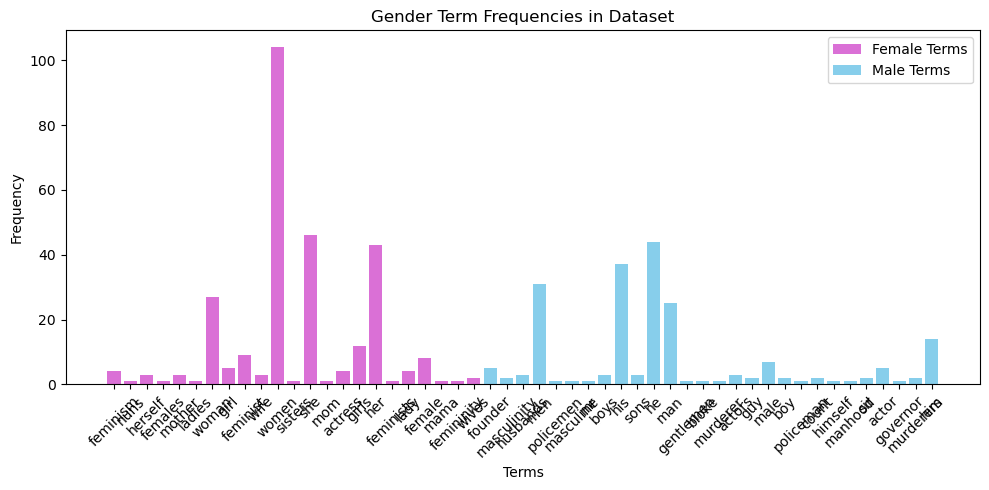

In [60]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

# Define gender terms
male_terms = {'god', 'gods', 'nephew', 'nephews', 'him', 'baron', 'father', 'fathers' 'dukes', 'dad', 'beau', 'beaus', 'daddies',
        'policeman', 'policemen', 'grandfather', 'landlord', 'landlords', 'monk', 'monks', 'step-son', 'step-sons', 
        'milkmen', 'chairmen', 'chairman', 'steward', 'men', 'masseurs', 'son-in-law', 'priest', 'king', 'governor', 
        'waiter', 'daddy', 'steward', 'emperor', 'son', 'proprietor', 'groom', 'grooms', 'gentleman', 'gentlemen', 'sir', 
        'wizards', 'sorcerer', 'lad','milk-man', 'grandson', 'grand-son','congressmen','dads', 'manager', 'prince', 'stepfathers', 
        'boyfriend', 'shepherd', 'shepherds', 'males', 'grandfathers', 'grand-fathers', 'husband', 'usher', 'postman','stags', 
        'husbands', 'host', 'boy', 'waiter', 'bachelor', 'bachelors', 'businessmen', 'duke', 'sirs', 'papas', 'heir', 'uncle', 
        'princes', 'fiance', 'mr', 'count', 'lords', 'father-in-law', 'actor', 'actors', 'postmaster', 'headmaster', 'heroes',
        'businessman', 'boars','wizard', 'sons-in-law', 'fiances', 'uncles', 'hunter', 'lads', 'masters', 'brother', 
        'hosts', 'poet', 'hero', 'grandpa', 'grandpas','manservant', 'heirs', 'male', 'tutors', 'millionaire',
        'congressman', 'sire', 'sires', 'widower','grandsons', 'grand-sons','boys', 'he', 'step-father', 'jewess', 'bridegroom', 'bridegrooms'
        'stepfather', 'widowers', 'abbot', 'mr.,' 'brothers', 'man', 'sons', 'boyfriends', 'he’s', 'his', 'earl', 
        'giant', 'stepson', 'stepsons', 'poet', 'mayor', 'peer', 'negro', 'abbot', 'traitor', 'benefactor',
        'instructor', 'conductor', 'founder', 'founders', 'hunters', 'huntresses', 'tempt', 'enchanter', 'enchanters', 'songster', 
        'songsters', 'murderer', 'murderers', 'patron', 'patrons', 'author', 'czar', 'guy', 'spokesman', 'spokesmen',
        'pa', 'councilman', 'council-man', 'councilmen', 'council-men', 'gay', 'gays', 'prostate cancer', 'fraternity', 'fraternities', 'salesman', 'dude', 'dudes', 'paternal',
        'brotherhood', 'statesman', 'statesmen', 'countryman', 'countrymen', 'suitor', 'macho', 'papa', 'strongman', 'strongmen',
        'boyhood', 'manhood', 'masculine', 'macho', 'horsemen', 'brethren', 'chap','chaps', 'schoolboy', 'schoolboys', 'bloke',
        'blokes', 'patriarch', 'patriachy', 'fatherhood', 'hubby', 'hubbies', 'fella', 'fellas', 'handyman', 'fraternal', 
        'bro', 'masculinity', 'ballerino', 'pappy', 'papi', 'pappies', 'dada', 'bf', 'bfs', 'knights', 'knight', 
        'menfolk', 'brotherly', 'manly', 'pimp', 'pimps', 'homeboy', 'homeboys','grandnephew', 'grand-nephew',
        'grand-nephew', 'grand-nephews', 'john doe', 'nobleman', 'noblemen', 'dream boy', 'himself', 'gramps'}
female_terms = {'goddesses', 'niece', 'baroness', 'mother', 'duchesses', 'mom', 'belle', 'belles', 'mummies', 'policewoman',
          'grandmother', 'landlady', 'landladies', 'nuns', 'stepdaughter', 'milkmaids', 'chairwomen', 'stewardesses',
          'women', 'masseuses', 'daughter-in-law', 'priestesses', 'stewardess', 'empress', 'daughter', 'queens',
          'proprietress', 'brides', 'lady', 'queen', 'matron', 'waitresses', 'mummy', 'empresses', 'madam', 
          'witches', 'sorceress', 'lass', 'milkmaid', 'granddaughter', 'grand-daughter', 'congresswomen','moms', 'manageress', 
          'princess', 'stepmothers', 'stepdaughters', 'girlfriend', 'shepherdess', 'females', 'grand-mothers', 'grandmothers'
          'step-daughter', 'nieces', 'priestess', 'wife', 'mothers', 'usherette', 'postwoman', 'hinds', 'wives', 
          'murderess', 'hostess', 'girl', 'waitress', 'spinster', 'shepherdess', 'businesswomen', 'duchess', 'madams', 'mamas',
          'nun', 'heiress', 'aunt', 'princesses', 'fiancee', 'mrs', 'ladies', 'mother-in-law', 'actress', 'actresses', 
          'postmistress', 'headmistress', 'heroines', 'bride', 'businesswoman', 'baronesses', 'sows', 'witch',
          'daughters-in-law','aunts', 'huntress', 'lasses', 'mistress', 'mistresses', 'sister', 'hostesses', 'poetess', 
          'masseuse', 'heroine', 'goddess','grandma', 'grandmas', 'maidservant', 'heiresses', 'patroness', 'female', 'governesses', 'millionairess', 'congresswoman', 'dam', 'widow', 'granddaughters', 'grand-daughters', 'headmistresses', 
          'girls', 'she', 'policewomen', 'step-mother','stepmother', 'widows', 'abbess', 'mrs.', 'chairwoman', 'sisters',
          'mama', 'woman','daughters', 'girlfriends', 'she’s', 'her', 'maid', 'countess', 'giantess', 'poetess', 'jew',
          'mayoress', 'peeress', 'negress', 'abbess', 'traitress', 'benefactress', 'instructress', 'conductress', 'founder',
          'huntress', 'temptress', 'enchantress', 'songstress', 'murderess', 'murderesses', 'patronesses', 'authoress', 'czarina',
          'spokeswoman', 'spokeswomen', 'ma', 'councilwoman', 'council-woman', 'councilwomen', 'council-women', 'mum', 'lesbian', 'lesbians', 'breast', 'breasts'
          'maiden', 'maidens', 'sorority', 'sororities', 'saleswoman', 'dudette', 'maternal', 'feminist', 'feminists', 'sisterhood', 
          'housewife', 'housewives', 'stateswoman', 'stateswomen', 'countrywoman', 'countrywomen', 'chick', 'chicks', 'mommy',
          'strongwoman', 'strongwomen', 'babe', 'babes', 'diva', 'divas', 'feminine', 'feminism', 'gal', 'gals', 'sistren', 'schoolgirl',
          'schoolgirls', 'matriarch', 'matriarchy', 'motherhood', 'wifey', 'sis', 'femininity', 'ballerina', 'ballerinas', 'granny', 
          'grannies', 'mami', 'momma', "ma'am", 'gf', 'gfs', 'damsel', 'damsels', 'vixen', 'vixens', 'nan', 'nanny', 'nannies',
          'auntie', 'womenfolk', 'sisterly', 'motherly', 'homegirl', 'homegirls', 'grand-neice', 'grand-neices',
          'grandneice', 'grandneices', 'jane doe', 'noblewoman', 'noblewomen', 'dream girl', 'madame', 'herself', 'hers'}

# Load the Excel file
df = pd.read_excel('C:/Users/HP/Downloads/Copy of unique_tweets(1).xlsx')

# Ensure the column name is correct
tweet_column = 'tweet'
df = df.dropna(subset=[tweet_column])  # Remove missing tweets

# Combine all tweets into one string
all_text = ' '.join(df[tweet_column].astype(str).tolist()).lower()

# Tokenize and count word frequency
word_freq = Counter(all_text.split())

# Extract and score gender-related terms
female_freqs = {term: word_freq[term] for term in female_terms if term in word_freq}
male_freqs = {term: word_freq[term] for term in male_terms if term in word_freq}

# Calculate scores
female_score = sum(female_freqs.values())
male_score = sum(male_freqs.values())
total_score = female_score + male_score

# Compute ratios and bias
if total_score > 0:
    female_ratio = female_score / total_score
    male_ratio = male_score / total_score
    bias_score = female_ratio - male_ratio
else:
    female_ratio = male_ratio = bias_score = 0

# Print details
print("=== Gender Term Frequencies ===")
print("Female Terms:")
for term, freq in female_freqs.items():
    print(f"  {term}: {freq}")
print("\nMale Terms:")
for term, freq in male_freqs.items():
    print(f"  {term}: {freq}")

print("\n=== Bias Summary ===")
print(f"Weighted Female Score: {female_score}")
print(f"Weighted Male Score: {male_score}")
print(f"Bias Score (female - male): {bias_score:.2f}")

if bias_score > 0:
    print("🟣 Dataset is biased toward females.")
elif bias_score < 0:
    print("🔵 Dataset is biased toward males.")
else:
    print("⚪ Dataset appears neutral.")

# Visualization
plt.figure(figsize=(10, 5))
plt.bar(female_freqs.keys(), female_freqs.values(), color='orchid', label='Female Terms')
plt.bar(male_freqs.keys(), male_freqs.values(), color='skyblue', label='Male Terms')
plt.title("Gender Term Frequencies in Dataset")
plt.xlabel("Terms")
plt.ylabel("Frequency")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
